## El mapeo Estándar




In [1]:
using PyPlot
using TaylorSeries
using IntervalArithmetic, IntervalRootFinding
using ValidatedNumerics
using StaticArrays

In [2]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

3-element Array{Any,1}:
 "/home/evelyn/julia0.6/julia-903644385b/local/share/julia/site/v0.6"
 "/home/evelyn/julia0.6/julia-903644385b/share/julia/site/v0.6"      
 "/home/evelyn/Documentos/Tesis/Programas/IPM"                       

In [3]:
using ParametrizacionMetodo

Vamos a aplicar el método al maepo estándar y al inverso. También queremos encontrar la intersección entre variedades

In [4]:
function Estandar(x,y,k)
   
    x_n = mod(x+k*sin(y),2.*pi)
    y_n = mod(x+y+k*sin(y),2.*pi)

    return [x_n,y_n]
end

Estandar (generic function with 1 method)

In [5]:
function EstandarI(x,y,k)
   
    x_n = mod(x-k*sin(y-x),2.*pi)
    y_n = mod(y-x,2.*pi)

    return [x_n,y_n]
end

EstandarI (generic function with 1 method)

Vamos a calcular primero las variedades estables e inestables asociadas al punto fijo (0,0) usando Float64 para un valor del parámetro de K=0.3, para posteriormente compararalas con el cálculo usando presición extendida.

Para poder usar las funciones del método de parametrización es necesario que el mapeo reciba dos parámetros de entrada

In [6]:
estandar1(x,y)=Estandar(x,y,0.3)
estandarI(x,y)=EstandarI(x,y,0.3)
estandar2(x,y)=Estandar(x,y,1.5)
estandar3(x,y)=Estandar(x,y,0.7)
estandar4(x,y)=Estandar(x,y,6.5)
estandar5(x,y)=EstandarI(x,y,1.5)

k=parse(BigFloat,"0.5")
estandar5(x,y)=Estandar(x,y,k)

estandar5 (generic function with 1 method)

In [7]:
k=parse(BigFloat,"0.3")
estandar6(x,y)=Estandar(x,y,k)

estandar6 (generic function with 1 method)

In [55]:
OrI = 20
x_fijo = [0.,0.] 
tiempo = [-10.,10.]
delta_t = 0.125
Wa, fa, vec_prop_a, val_prop_a = Estable(estandar1,OrI , x_fijo,tiempo, delta_t);
Wb, fb, vec_prop_b, val_prop_b = Inestable(estandarI,OrI , x_fijo,tiempo, delta_t);

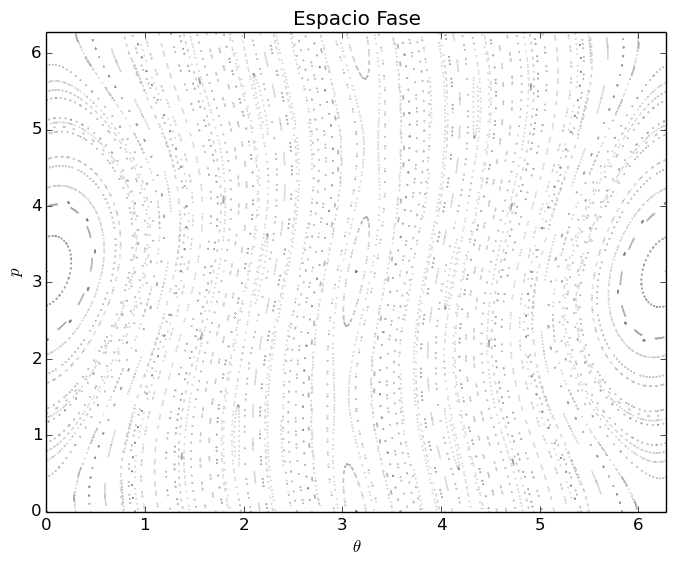

In [62]:
#Graficar([-.1,-7.4], 0.025, 0.3, Wa[1],Wa[2],[0.,0.],"orangered")
Graficar([-0.1,-7.2], -0.025, 0.3, Wb[1],Wb[2],[0.,0.],"royalblue")

In [63]:
tiem = [0.1,10.]
ErrorA = CalculoError(estandar1,2*pi, Wa,fa,tiem,0.025 )
ErrorB = CalculoError(estandarI,2*pi, Wb,fb,tiem,0.025 )

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] mod(::Array{TaylorSeries.Taylor1{Float64},1}, ::Float64) at ./deprecated.jl:57
 [3] Invariancia at /home/evelyn/Documentos/Tesis/Programas/IPM/VariedadesIPM.jl:395 [inlined]
 [4] CalculoError(::Function, ::Float64, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{Float64,1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/VariedadesIPM.jl:565
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/evelyn/.julia/v0.6/IJulia/src/execute_request.jl:193
 [7] (::Compat.#inner#14{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/evelyn/.julia/v0.6/Compat/src/Compat.jl:332
 [8] eventloop(::ZMQ.Socket) at /home/evelyn/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##13#16)() at ./task.jl:335
while loading In[63], in expression starting on line 2
Stacktrace:
 [1] depwarn(::Str

2-element Array{Array{Float64,1},1}:
 [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325  …  9.775, 9.8, 9.825, 9.85, 9.875, 9.9, 9.925, 9.95, 9.975, 10.0]                                                                                              
 [8.32927e-18, 1.04134e-17, 1.24988e-17, 1.45856e-17, 1.66741e-17, 1.87646e-17, 2.08573e-17, 2.29524e-17, 2.50502e-17, 2.71508e-17  …  188.406, 198.21, 208.488, 219.257, 230.538, 242.347, 254.699, 267.611, 281.091, 295.146]

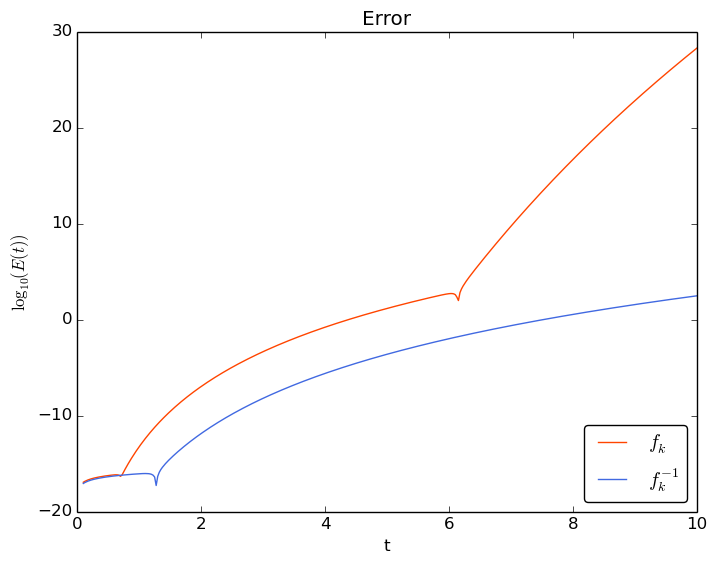

PyObject <matplotlib.legend.Legend object at 0x7fdbb2ef1d50>

In [64]:
plot(ErrorA[1],log10.(ErrorA[2]),marker= "None", label=L"f_{k}",color="orangered")
plot(ErrorB[1],log10.(ErrorB[2]),marker= "None", label=L"f_{k}^{-1}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

In [8]:
OrI = 20
x_fijo = [0.,0.] 
tiempo = [-13.,13.]
delta_t = 0.125
W1, f1, vec_prop_1, val_prop_1 = Estable(estandar2,OrI , x_fijo,tiempo, delta_t);
W2, f2, vec_prop_2, val_prop_2 = Inestable(estandar2,OrI , [0,2*pi],tiempo, delta_t);

In [9]:
function iterarMap(f,x_i,p_i,n, k)   #Definimos una función para iterar el mapeo
    
    x = x_i                      #    
                                     #Damos condiciones iniciales
    y = p_i                          #

    iteradosMX = [x_i]

    iteradosMY = [p_i]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente            

        F = f(x_i,p_i, k)
        
        push!(iteradosMX,F[1])
        
        push!(iteradosMY,F[2])
            

        x_i = F[1]

        p_i = F[2]
    end

    return iteradosMX, iteradosMY  #La funcion iterados regresa las listas que corresponden a la trayectoria del 
end

iterarMap (generic function with 1 method)

In [10]:
function graficarMap(k)
    n = 50
    s=2pi/14
    i=0
    
    for p_i=0:s:2pi
        for x_i =0:s:2pi
            i=i+1
            t,p = iterarMap(Estandar,x_i,p_i,n, k)
            p = scatter(t,p,marker=".",s=0.1,color="gray")
        end
    end
    
end
#"cadetblue"

graficarMap (generic function with 1 method)

In [11]:
function evaluar(Tiempo, paso,A,B,PuntoFijo,col)
    ValX = Float64[]
    ValY = Float64[]
    
    push!(ValX, PuntoFijo[1]) 
    push!(ValY, PuntoFijo[2])
    for t = Tiempo[1]:-paso:Tiempo[2]
        
       # x = mod(Float64(evaluate(A,t)),2*pi)
       # y = mod(Float64(evaluate(B,t)),2*pi)
        x = Float64(evaluate(A,t))
        y = Float64(evaluate(B,t))
    
        #x = Float64(evaluate(A,t))
        #y = Float64(evaluate(B,t))
    
        push!(ValX,x)
        push!(ValY,y)
        
    end
    
    p = plot(ValX,ValY,linestyle = "-",marker=",",color=col)
    
    #@show(ValX,ValY)
    
    title("Espacio Fase")
    xlabel(L"$\theta$")
    ylabel(L"$p$")
    xlim(0.,2*pi)
    ylim(0.,2*pi)
    legend(loc="upper right",fancybox="true")
    

    
end

evaluar (generic function with 1 method)

Primero calculamos la variedad inestable con un polinomio de orden 20

In [12]:
function Graficar(Tiempo, paso, k,A,B,PuntoFijo,col)
    graficarMap(k)
    evaluar(Tiempo,paso,A,B,PuntoFijo,col)
    #evaluar(Tiempo,paso,C,D)
end

Graficar (generic function with 1 method)

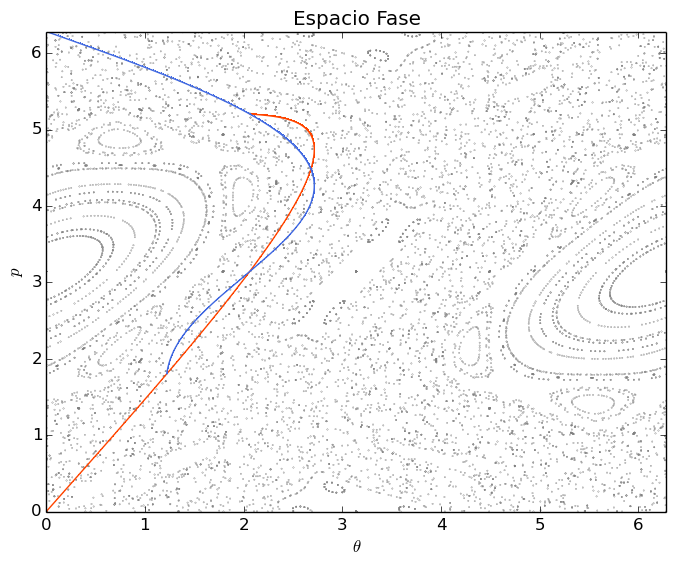

In [20]:
Graficar([-.1,-13.4], 0.025, 1.5, W1[1],W1[2],[0.,0.],"orangered")
Graficar([-0.1,-14.2], 0.025, 1.5, W2[1],W2[2],[0.,2*pi],"royalblue")

In [14]:
tiem = [0.1,15.]
ErrorI_O20 = CalculoError(estandar2,2*pi, W1,f1,tiem,0.025 )
ErrorE_O20 = CalculoError(estandar2,2*pi, W2,f2,tiem,0.025 )


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] mod(::Array{TaylorSeries.Taylor1{Float64},1}, ::Float64) at ./deprecated.jl:57
 [3] Invariancia at /home/evelyn/Documentos/Tesis/Programas/IPM/VariedadesIPM.jl:395 [inlined]
 [4] CalculoError(::Function, ::Float64, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{Float64,1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/VariedadesIPM.jl:565
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/evelyn/.julia/v0.6/IJulia/src/execute_request.jl:193
 [7] (::Compat.#inner#14{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/evelyn/.julia/v0.6/Compat/src/Compat.jl:332
 [8] eventloop(::ZMQ.Socket) at /home/evelyn/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##13#16)() at ./task.jl:335
while loading In[14], in expression starting on line 2
Stacktrace:
 [1] depwarn(::Str

2-element Array{Array{Float64,1},1}:
 [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325  …  14.775, 14.8, 14.825, 14.85, 14.875, 14.9, 14.925, 14.95, 14.975, 15.0]                                                                                                                 
 [2.77528e-18, 3.4689e-18, 4.16239e-18, 4.85572e-18, 5.54887e-18, 6.24181e-18, 6.93451e-18, 7.62695e-18, 8.3191e-18, 9.01094e-18  …  3.76514e-7, 4.3135e-7, 4.94058e-7, 5.65751e-7, 6.47699e-7, 7.41347e-7, 8.48341e-7, 9.70556e-7, 1.11012e-6, 1.26948e-6]

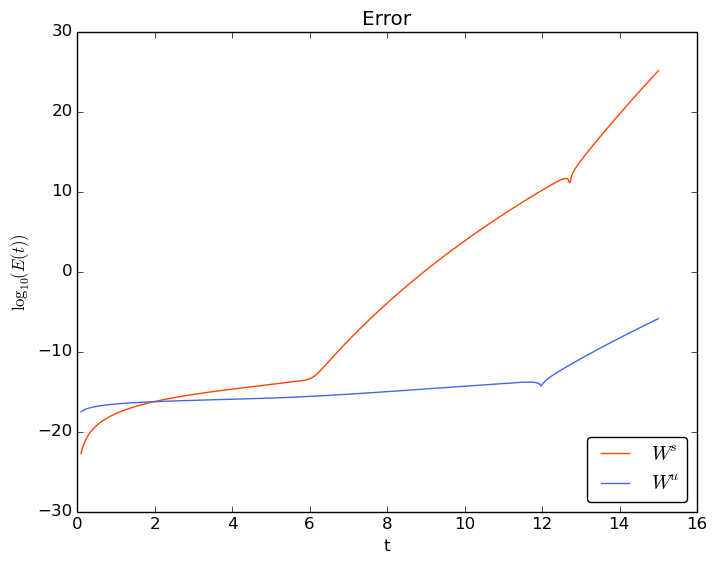

PyObject <matplotlib.legend.Legend object at 0x7fdbc0a6fe90>

In [15]:
plot(ErrorI_O20[1],log10.(ErrorI_O20[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorE_O20[1],log10.(ErrorE_O20[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

Convergencia

In [17]:

Conver03U=Convergencia(W1[1],W1[2])#Convergencia segun Hadamard
Conver03S=Convergencia(W2[1],W2[2])


(Any[8.19351e-17, -7.69439e14, 1.38094e-16, -3.8426e14, 1.90341e-16, -2.41007e14, 2.3812e-16, -1.71261e14, 2.83234e-16, -1.31106e14  …  4.11225e-16, -7.49198e13, 4.52542e-16, -6.52194e13, 4.93399e-16, -5.76471e13, 5.33858e-16, -5.15833e13, 5.73965e-16, -4.66252e13], Any[0.129289, 3.01466e-17, -3.6889e14, 7.29003e-17, -2.1218e14, 1.07579e-16, -1.37959e14, 1.37282e-16, -9.91389e13, 1.64342e-16  …  2.39348e-16, -4.36083e13, 2.63417e-16, -3.79639e13, 2.87208e-16, -3.35566e13, 3.10762e-16, -3.0027e13, 3.3411e-16, -2.71409e13])

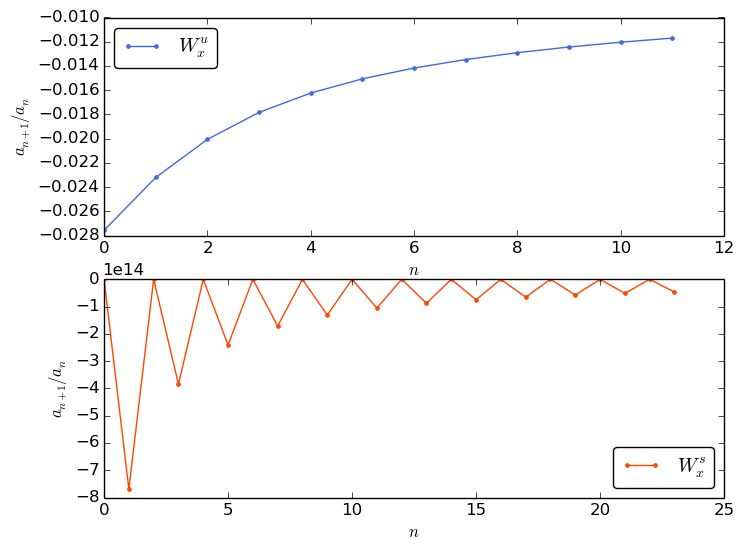

/usr/lib/pymodules/python2.7/matplotlib/legend.py:317: UserWarning: Unrecognized location "low right". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes.iterkeys())))


PyObject <matplotlib.legend.Legend object at 0x7f524f43ddd0>

In [18]:
subplot(2,1,1)
plot(Conver03U[1],marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Conver03S[1],marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )

In [9]:
estandarP(x,y) = EstandarI(x,y,1.5)

estandarP (generic function with 1 method)

In [21]:
estandarP(1.,2.)

2-element Array{Float64,1}:
 6.02098
 1.0    

In [10]:
Orden2 = 120
x_fijo2 = [0.,0.] 
tiempo = [-3.,3.]
delta_t = 0.125
W3, f3, vec_prop3, val_prop3 = Inestable(estandarP, Orden2 , x_fijo2,tiempo, delta_t); #estable calculada con el inverso
W4, f4, vec_prop4, val_prop4 = Inestable(estandar2,Orden2 , [0.,2*pi],tiempo, delta_t);

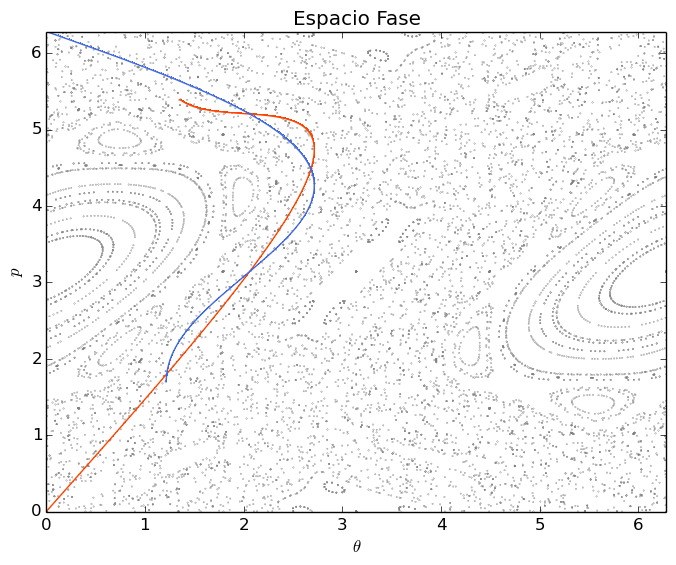

In [43]:
Graficar([0.,-19.], 0.025, 1.5, -W3[1],-W3[2],[0.,0.],"orangered")
Graficar([-0.1,-14.9], 0.025, 1.5, W4[1],W4[2],[0.,2*pi],"royalblue")

In [11]:
tiem = [-0.1,-20.]
ErrorI_O60 = CalculoError(estandarP,2*pi, W3,f3,tiem,-0.025 );
ErrorE_O60 = CalculoError(estandar2,2*pi, W4,f4,tiem,-0.025 );


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] mod(::Array{TaylorSeries.Taylor1{Float64},1}, ::Float64) at ./deprecated.jl:57
 [3] Invariancia at /home/evelyn/Documentos/Tesis/Programas/IPM/VariedadesIPM.jl:395 [inlined]
 [4] CalculoError(::Function, ::Float64, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{Float64,1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/VariedadesIPM.jl:565
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/evelyn/.julia/v0.6/IJulia/src/execute_request.jl:193
 [7] (::Compat.#inner#14{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/evelyn/.julia/v0.6/Compat/src/Compat.jl:332
 [8] eventloop(::ZMQ.Socket) at /home/evelyn/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##13#16)() at ./task.jl:335
while loading In[11], in expression starting on line 2
Stacktrace:
 [1] depwarn(::Str

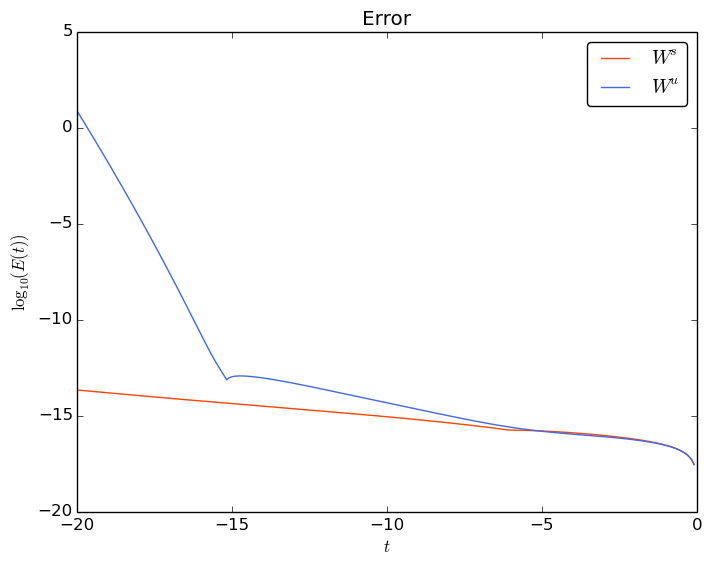

PyObject <matplotlib.legend.Legend object at 0x7fdbb84893d0>

In [45]:
plot(ErrorI_O60[1],log10.(ErrorI_O60[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorE_O60[1],log10.(ErrorE_O60[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel(L"t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="upper right",fancybox="true" )

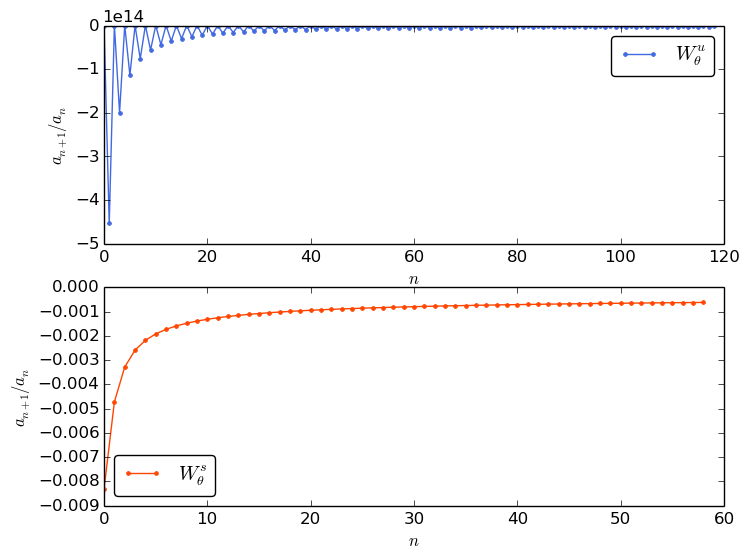

PyObject <matplotlib.legend.Legend object at 0x7f524b3f2f90>

In [25]:
Conver15S=Convergencia(W3[1],W3[2])#Convergencia segun Hadamard
Conver15U=Convergencia(W4[1],W4[2])
subplot(2,1,2)
plot(Conver15S[1],marker=".",label=L"W^{s}_{\theta}",color="orangered")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )

subplot(2,1,1)
plot(Conver15U[1],marker=".",label=L"W^{u}_{\theta}",color="royalblue")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )

In [21]:
Orden2 = 70
x_fijo2 = [0.,0.] 
tiempo = [-3.,3.]
delta_t = 0.125
W5, f5, vec_prop5, val_prop5 = Estable(estandar3,Orden2 , x_fijo2,tiempo, delta_t)
W6, f6, vec_prop6, val_prop6 = Inestable(estandar3,Orden2 , [0.,2*pi],tiempo, delta_t)

(TaylorSeries.Taylor1{Float64}[ - 0.7825467640435103 t - 5.2520594867537415e-17 t² + 0.033267618405501714 t³ + 3.3771775736021163e-18 t⁴ - 0.0010050657449176333 t⁵ - 1.3247247521382452e-19 t⁶ + 2.36188602634025e-5 t⁷ + 3.765838545841778e-21 t⁸ - 4.636599529381641e-7 t⁹ - 8.619080142104579e-23 t¹⁰ + 7.974673329556472e-9 t¹¹ + 1.687757202575823e-24 t¹² - 1.2392691311770385e-10 t¹³ - 2.935249024811817e-26 t¹⁴ + 1.775971444518175e-12 t¹⁵ + 4.646240620984954e-28 t¹⁶ - 2.3806626618570808e-14 t¹⁷ - 6.808424428629617e-30 t¹⁸ + 3.0160566813133576e-16 t¹⁹ + 9.35022667016847e-32 t²⁰ - 3.639553444733593e-18 t²¹ - 1.2146437939828839e-33 t²² + 4.208805106009399e-20 t²³ + 1.5032960182483875e-35 t²⁴ - 4.686762104617711e-22 t²⁵ - 1.7827298889326392e-37 t²⁶ + 5.045454674572387e-24 t²⁷ + 2.0350718536640374e-39 t²⁸ - 5.268128231681426e-26 t²⁹ - 2.2448251288941275e-41 t³⁰ + 5.349700966812674e-28 t³¹ + 2.4003728717496072e-43 t³² - 5.295784693523868e-30 t³³ - 2.494832822064891e-45 t³⁴ + 5.120675231551883e-32

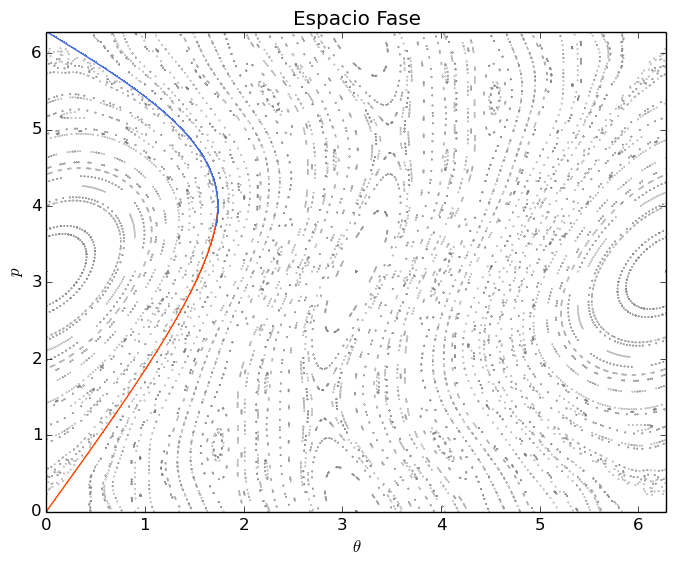

In [22]:
Graficar([-.1,-6.], 0.025, 0.7, W5[1],W5[2],[0.,0.],"orangered")
Graficar([-0.1,-4.5], 0.025, 0.7, W6[1],W6[2],[0.,2*pi],"royalblue")

In [23]:
tiem = [0.1,7.]
ErrorI_O70 = CalculoError(estandar3,2*pi, W5,f5,tiem,0.025 )
ErrorE_O70 = CalculoError(estandar3,2*pi, W6,f6,tiem,0.025 )


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] mod(::Array{TaylorSeries.Taylor1{Float64},1}, ::Float64) at ./deprecated.jl:57
 [3] Invariancia at /home/evelyn/Documentos/Tesis/Programas/IPM/VariedadesIPM.jl:395 [inlined]
 [4] CalculoError(::Function, ::Float64, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{Float64,1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/VariedadesIPM.jl:565
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/evelyn/.julia/v0.6/IJulia/src/execute_request.jl:193
 [7] (::Compat.#inner#14{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/evelyn/.julia/v0.6/Compat/src/Compat.jl:332
 [8] eventloop(::ZMQ.Socket) at /home/evelyn/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##13#16)() at ./task.jl:335
while loading In[23], in expression starting on line 2
Stacktrace:
 [1] depwarn(::Str

2-element Array{Array{Float64,1},1}:
 [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325  …  6.775, 6.8, 6.825, 6.85, 6.875, 6.9, 6.925, 6.95, 6.975, 7.0]                                                                                                                                 
 [1.11022e-17, 1.38778e-17, 1.66533e-17, 1.94289e-17, 2.22045e-17, 2.498e-17, 2.77556e-17, 3.05312e-17, 3.33067e-17, 3.60823e-17  …  1.35549e-10, 1.75731e-10, 2.27604e-10, 2.94509e-10, 3.80718e-10, 4.917e-10, 6.3444e-10, 8.17857e-10, 1.05333e-9, 1.35535e-9]

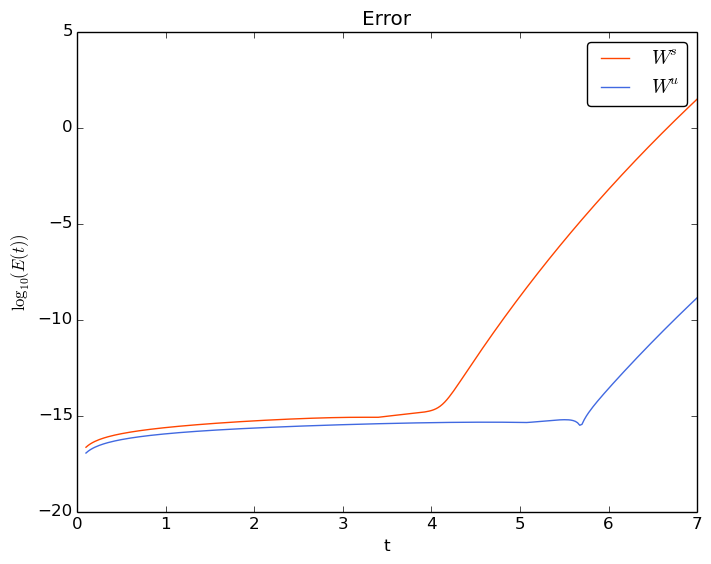

/usr/lib/pymodules/python2.7/matplotlib/legend.py:317: UserWarning: Unrecognized location "low right". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes.iterkeys())))


PyObject <matplotlib.legend.Legend object at 0x7fdbb96e7350>

In [24]:
plot(ErrorI_O70[1],log10.(ErrorI_O70[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorE_O70[1],log10.(ErrorE_O70[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

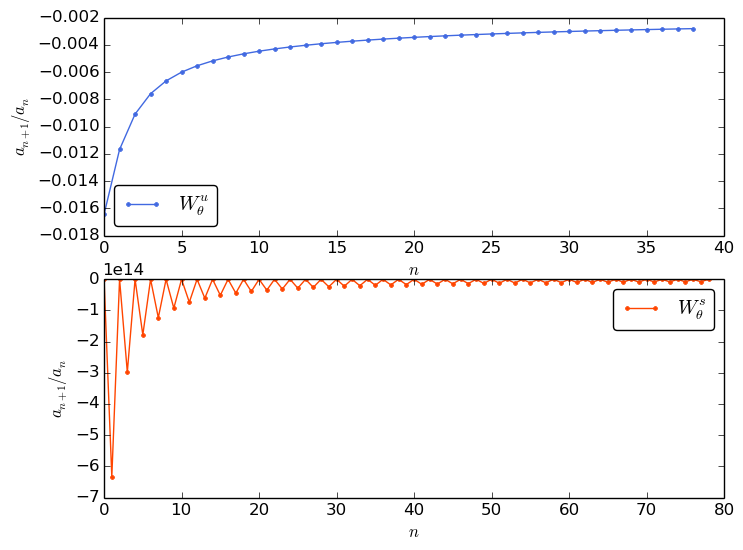

PyObject <matplotlib.legend.Legend object at 0x7f524a756d50>

In [30]:
Conver07U=Convergencia(W5[1],W5[2])#Convergencia segun Hadamard
Conver07S=Convergencia(W6[1],W6[2])
subplot(2,1,1)
plot(Conver07U[1],marker=".",label=L"W^{u}_{\theta}",color="royalblue")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Conver07S[1],marker=".",label=L"W^{s}_{\theta}",color="orangered")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )
legend(loc="low right",fancybox="true" )

In [31]:
function Intersección(p)
    (x,y)=p
    V= SVector( -W3[1](x)-W4[1](y), -W3[2](x)-W4[2](y) )
#    @show(p, V)
end

Intersección (generic function with 1 method)

In [32]:
X = (-20..(0.0))×(-15..(0.)) # 2D IntervalBox;

In [33]:
Intersección(X)

2-element StaticArrays.SArray{Tuple{2},IntervalArithmetic.Interval{Float64},1,2}:
 [-429.502, 411.649] 
  [-50.8377, 52.2751]

In [34]:
r = roots(Intersección, X, Newton, 1e-6)

4-element Array{IntervalRootFinding.Root{IntervalArithmetic.IntervalBox{2,Float64}},1}:
 Root([-7.16826, -7.16825] × [-4.45972, -4.45971], :unique)
 Root([-4.21757, -4.21756] × [-8.36029, -8.36028], :unique)
 Root([-2.24983, -2.24982] × [-14.2093, -14.2092], :unique)
 Root([-13.4378, -13.4377] × [-2.62396, -2.62395], :unique)

In [35]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

In [36]:
px = W3[1](r[1].interval[1].lo)
py = W3[2](r[1].interval[1].lo)
qx = W4[1](r[1].interval[2].hi)
qy = W4[2](r[1].interval[2].hi)
sx = W3[1](r[1].interval[1].hi)
sy = W3[2](r[1].interval[1].hi)
ux = W4[1](r[1].interval[2].lo)
uy = W4[2](r[1].interval[2].lo)

4.482072975493849

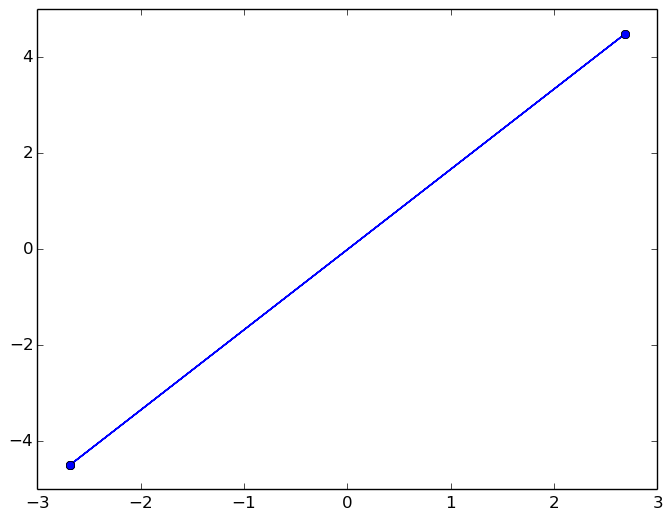

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f524fbf6b90>

In [37]:
#|pygui(true)
list_x = [px,qx,sx,ux,px]
list_y = [py,qy,sy,uy,py]
plot(list_x,list_y,"o",linestyle="-")


In [38]:
(dy-ay)-(cy-by)

LoadError: [91mUndefVarError: dy not defined[39m

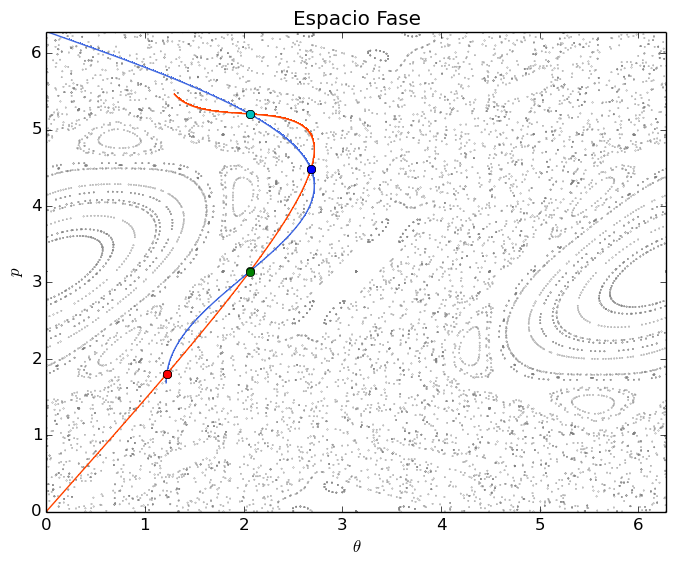

In [39]:
#pygui(true)
Graficar([-.1,-20.0], 0.025, 1.5, -W3[1],-W3[2],[0.,0.],"orangered")
Graficar([-.2,-15], 0.025, 1.5, W4[1],W4[2],[0.,2*pi],"royalblue")

for ind in eachindex(r)
    plot(-W3[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         -W3[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]),"o")
end

In [40]:
r[1].interval[1].hi<r[1].interval[1].lo

false

In [96]:
#pygui(true)
cfig = figure()
Graficar([-.1,-20.0], 0.025, 1.5, W3[1],W3[2],[0.,0.],"orangered")
Graficar([r[1].interval[1].hi,r[1].interval[1].lo], 1e-15, 1.5, W3[1],W3[2],[0.,0.],"green")
#Graficar([-.1,-15.307927223307495], 0.025, 1.5, W4[1],W4[2],[0.,0.],"royalblue")
#x1 = W3[1](r[1].interval[1].lo)
#y1 = W3[2](r[1].interval[1].lo)
#x2 = W3[1](r[1].interval[1].hi)
#y2 = W3[1](r[1].interval[1].hi)



#x_interval = W3[1].([r[1].interval[1].lo, r[1].interval[1].hi])
#y_interval = W3[2].([r[1].interval[1].lo, r[1].interval[1].hi])
#diam_x = x_interval[2]-x_interval[1]
#diam_y = y_interval[2]-y_interval[1]
#plot((x_interval[1],y_interval[1]),"o")

diam_x = qx-px
diam_y = sy-qy

#ax = cfig[:add_subplot](1,1,1)
#ax[:set_aspect]("equal")

#c = patch.Rectangle([px,py],1.3,1.3,fc="green",ec="red",linewidth=.5,alpha=0.2)
#plot([px,qx,sx,ux,px],[py,qy,sy,uy,py],"o",linestyle="-")
#c1 = patch.Rectangle([px,py],1.3,1.3,fc="blue",ec="red",linewidth=.5,alpha=0.2)
#c2 = patch.Rectangle([qx,qy],1.3,1.3,fc="red",ec="red",linewidth=.5,alpha=0.2)
#c3 = patch.Rectangle([ux,uy],1.3,1.3,fc="purpĺe",ec="red",linewidth=.5,alpha=0.2)
#ax[:add_artist](c)
#ax[:add_artist](c1)
#ax[:add_artist](c2)
#ax[:add_artist](c3)
cfig[:savefig]("rectangle.png")
grid("on")




In [97]:
tiem = [0.1,8.]
ErrorI = CalculoError(estandar2,2*pi, W3,f3,tiem,0.025 )
ErrorE = CalculoError(estandar2,2*pi, W4,f4,tiem,0.025 )
plot(ErrorI[1],log10.(ErrorI[2]),marker= "None", label=L"$W^{s}$",color="orangered")
plot(ErrorE[1],log10.(ErrorE[2]),marker= "None", label=L"$W^{u}$",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}$($|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

Pol_vec = TaylorSeries.Taylor1{Float64}[ - 0.5657674649689923 t + 0.004703846904556358 t³ - 2.221928005545399e-5 t⁵ + 7.305101392244316e-8 t⁷ - 1.8919971477647044e-10 t⁹ + 4.1353039532921944e-13 t¹¹ - 7.943584166195931e-16 t¹³ + 1.376510822084113e-18 t¹⁵ - 2.1908409931922147e-21 t¹⁷ + 3.2447771528869936e-24 t¹⁹ - 4.516344426766675e-27 t²¹ + 5.953254848384847e-30 t²³ - 7.477403276753981e-33 t²⁵ + 8.993852367007239e-36 t²⁷ - 1.0402479096802987e-38 t²⁹ + 1.161006940252089e-41 t³¹ - 1.2540795344071896e-44 t³³ + 1.314356467833497e-47 t³⁵ - 1.3395496869353626e-50 t³⁷ + 1.330154855685114e-53 t³⁹ - 1.2890927923853674e-56 t⁴¹ + 1.2211315070624048e-59 t⁴³ - 1.1322029525320692e-62 t⁴⁵ + 1.0287196098877029e-65 t⁴⁷ - 9.169726694688458e-69 t⁴⁹ + 8.026635934895053e-72 t⁵¹ - 6.905909819219681e-75 t⁵³ + 5.844896338260399e-78 t⁵⁵ - 4.87000976412421e-81 t⁵⁷ + 3.9974412286843215e-84 t⁵⁹ + 𝒪(t¹⁶¹),  - 0.8245648401323938 t + 0.004853918195143733 t³ - 2.2287158201245017e-5 t⁵ + 7.307293702156973e-8 t⁷ - 1.89

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] mod(::Array{TaylorSeries.Taylor1{Float64},1}, ::Float64) at ./deprecated.jl:57
 [3] Invariancia(::#estandar2, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/VariedadesIPM.jl:395
 [4] CalculoError(::Function, ::Float64, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{Float64,1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/VariedadesIPM.jl:565
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/evelyn/.julia/v0.6/IJulia/src/execute_request.jl:158
 [7] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/evelyn/.julia/v0.6/Compat/src/Compat.jl:385
 [8] eventloop(::ZMQ.Socket) at /home/evelyn/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at 

PyObject <matplotlib.legend.Legend object at 0x7ff5f866d5d0>

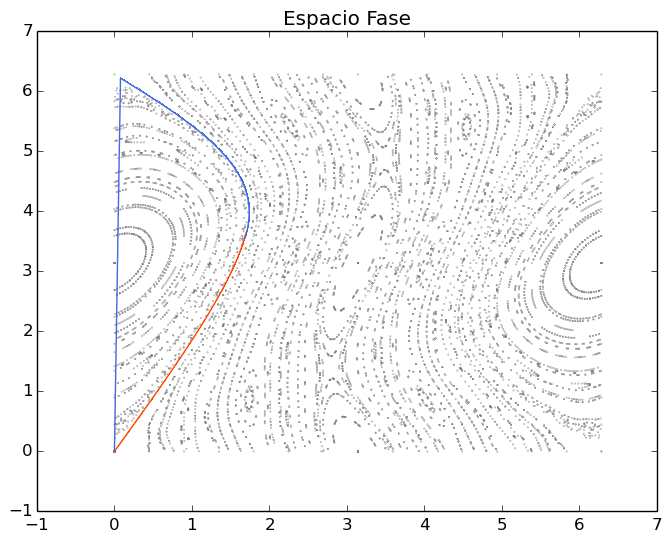

In [71]:
Graficar([-0.1,-5.307927223307495], 0.025, 0.7, W5[1],W5[2],[0.,0.],"orangered")
Graficar([-0.1,-4.9], 0.025, 0.7, W6[1],W6[2],[0.,0.],"royalblue")

Pol_vec = TaylorSeries.Taylor1{Float64}[ - 0.48655214326990026 t + 0.007996114079048246 t³ - 9.33877520929062e-5 t⁵ + 8.483841910858381e-7 t⁷ - 6.438302788902717e-9 t⁹ + 4.2807798391622484e-11 t¹¹ - 2.571661498541348e-13 t¹³ + 1.4246964087345968e-15 t¹⁵ - 7.382821897854332e-18 t¹⁷ + 3.6157817658906496e-20 t¹⁹ - 1.686743295257302e-22 t²¹ + 7.5404608111221215e-25 t²³ - 3.246012301800453e-27 t²⁵ + 1.3508767929058074e-29 t²⁷ - 5.452679226849011e-32 t²⁹ + 2.1405299013517115e-34 t³¹ - 8.19144071128183e-37 t³³ + 3.061930894674952e-39 t³⁵ - 1.1199020097371758e-41 t³⁷ + 4.013962834015541e-44 t³⁹ - 1.4117450541293066e-46 t⁴¹ + 4.878027053306268e-49 t⁴³ - 1.6576664243822966e-51 t⁴⁵ + 5.545336177833991e-54 t⁴⁷ - 1.827715858453541e-56 t⁴⁹ + 5.9398675300074565e-59 t⁵¹ - 1.9047538282543774e-61 t⁵³ + 6.0308015789175487e-64 t⁵⁵ - 1.88643540535452e-66 t⁵⁷ + 5.832778132663692e-69 t⁵⁹ - 1.7835821097120298e-71 t⁶¹ + 5.396299050105484e-74 t⁶³ - 1.6161088601360966e-76 t⁶⁵ + 4.792809716677209e-79 t⁶⁷ - 1.4080

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] mod(::Array{TaylorSeries.

Ecua_Invariancia = TaylorSeries.Taylor1{Float64}[ 2.220446049250313e-16 t + 1.3877787807814457e-17 t³ - 8.673617379884035e-19 t⁵ - 1.6940658945086007e-21 t⁹ - 5.293955920339377e-23 t¹¹ + 3.308722450212111e-24 t¹³ + 1.6155871338926322e-27 t¹⁷ + 5.048709793414476e-29 t¹⁹ - 7.888609052210118e-31 t²¹ - 1.232595164407831e-32 t²³ + 3.851859888774472e-34 t²⁵ + 6.018531076210112e-36 t²⁷ + 1.88079096131566e-37 t²⁹ - 2.938735877055719e-39 t³¹ + 1.3775324423698682e-40 t³³ + 3.503246160812043e-46 t³⁹ - 5.473822126268817e-48 t⁴¹ - 2.6727647100921956e-51 t⁴⁵ + 5.156055400511253e-59 t⁷¹ - 7.579316448375715e-61 t⁷³ + 1.1047717338112388e-62 t⁷⁵ - 1.5972361269741704e-64 t⁷⁷ + 2.2910595641954942e-66 t⁷⁹ - 3.261250721264295e-68 t⁸¹ + 4.608039629180395e-70 t⁸³ - 6.464432033044446e-72 t⁸⁵ + 9.005739141733918e-74 t⁸⁷ - 1.2461518669923356e-75 t⁸⁹ + 1.713043890087858e-77 t⁹¹ - 2.3398661881996913e-79 t⁹³ + 3.1762434780938094e-81 t⁹⁵ - 4.2855679603089155e-83 t⁹⁷ + 5.748348032673674e-85 t⁹⁹ - 7.666248212913193e-8

Taylor1{Float64},1}, ::Float64) at ./deprecated.jl:57
 [3] Invariancia(::#estandar3, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/respaldo1.jl:469
 [4] CalculoError(::Function, ::Float64, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{Float64,1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/respaldo1.jl:641
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /home/evelyn/.julia/v0.6/Compat/src/Compat.jl:71
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/evelyn/.julia/v0.6/IJulia/src/execute_request.jl:158
 [8] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/evelyn/.julia/v0.6/Compat/src/Compat.jl:385
 [9] eventloop(::ZMQ.Socket) at /home/evelyn/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./

TaylorSeries.Taylor1{Float64}[ - 0.7825467640435103 t + 0.033267618405501714 t³ - 0.0010050657449176333 t⁵ + 2.36188602634025e-5 t⁷ - 4.636599529381641e-7 t⁹ + 7.974673329556472e-9 t¹¹ - 1.2392691311770385e-10 t¹³ + 1.775971444518175e-12 t¹⁵ - 2.3806626618570808e-14 t¹⁷ + 3.0160566813133576e-16 t¹⁹ - 3.639553444733593e-18 t²¹ + 4.208805106009399e-20 t²³ - 4.686762104617711e-22 t²⁵ + 5.045454674572387e-24 t²⁷ - 5.268128231681426e-26 t²⁹ + 5.349700966812674e-28 t³¹ - 5.295784693523868e-30 t³³ + 5.120675231551883e-32 t³⁵ - 4.844775882455147e-34 t³⁷ + 4.49188712357653e-36 t³⁹ - 4.0867077572499494e-38 t⁴¹ + 3.652778447573804e-40 t⁴³ - 3.210983604501248e-42 t⁴⁵ + 2.778629528256406e-44 t⁴⁷ - 2.3690447631740006e-46 t⁴⁹ + 1.9916048083282376e-48 t⁵¹ - 1.652064813865969e-50 t⁵³ + 1.3530850206185607e-52 t⁵⁵ - 1.0948479386654196e-54 t⁵⁷ + 8.756874852650685e-57 t⁵⁹ - 6.926735646261784e-59 t⁶¹ + 5.4211738534314534e-61 t⁶³ - 4.1998110986813896e-63 t⁶⁵ + 3.2218932915982066e-65 t⁶⁷ - 2.448493311895455e-

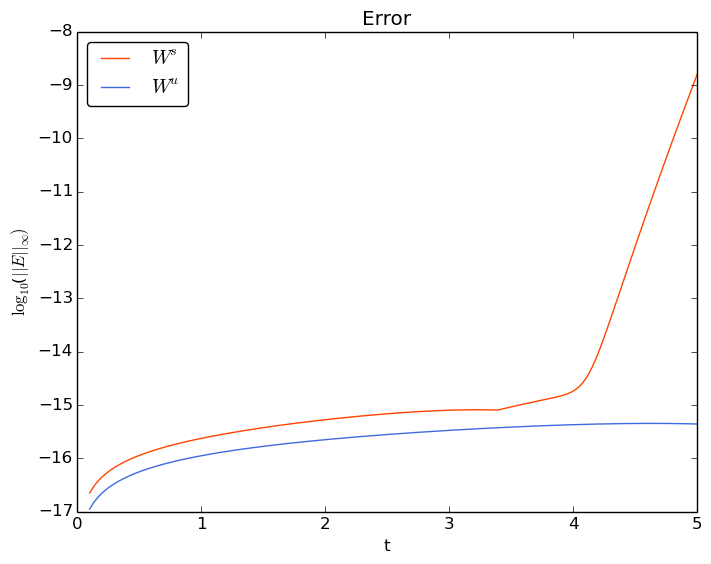

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] mod(::Array{TaylorSeries.Taylor1{Float64},1}, ::Float64) at ./deprecated.jl:57
 [3] Invariancia(::#estandar3, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/respaldo1.jl:469
 [4] CalculoError(::Function, ::Float64, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{Float64,1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/respaldo1.jl:641
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /home/evelyn/.julia/v0.6/Compat/src/Compat.jl:71
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/evelyn/.julia/v0.6/IJulia/src/execute_request.jl:158
 [8] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/evelyn/.julia/v0.6/Compat/src/Compat.jl:385
 [9] eventloop(::Z

PyObject <matplotlib.legend.Legend object at 0x7f8bd14e1910>

In [44]:
tiem = [0.1,5.]
ErrorA = CalculoError(estandar3,2*pi, W5,f5,tiem,0.025 )
ErrorB = CalculoError(estandar3,2*pi, W6,f6,tiem,0.025 )
plot(ErrorA[1],log10.(ErrorA[2]),marker= "None", label=L"$W^{s}$",color="orangered")
plot(ErrorB[1],log10.(ErrorB[2]),marker= "None", label=L"$W^{u}$",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}$($|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

In [ ]:
Orden = 35
a= big(pi)
b=parse(BigFloat,"0.")
x_fijo = [b,b] 
c=parse(BigFloat,"4.")
tiempo = [-c,c]
delta_t = parse(BigFloat, "0.125")
W_uB, f_uB, vec_propuB, val_propuB = Inestable(g_estandar,Orden , x_fijo,tiempo, delta_t)
W_sB, f_sB, vec_propsB, val_propsB = Estable(g_estandar,Orden , x_fijo,tiempo, delta_t)

In [ ]:
Graficar([big(0.1),big(4.1)], big(0.025), big(0.3), W_uB[1],W_uB[2],[big(0.),big(0.)])
Graficar([big(0.1),5.], big(0.025), big(0.3), W_sB[1],W_sB[2],[big(0.),big(0.)])

In [ ]:
ErrorIB_O20 = CalculoError(g_estandar,big(2*pi), W_uB,f_uB,[-big(0.),big(4.)],big(0.025) )
ErrorEB_O20 = CalculoError(g_estandar,big(2*pi), W_sB,f_sB,[-big(0.),big(4.)],big(0.025 ))

In [ ]:
plot(ErrorIB_O20[1],log10(ErrorIB_O20[2]),marker= "None", label="Inestable 20")
plot(ErrorEB_O20[1],log10(ErrorEB_O20[2]),marker= "None", label="Estable 20")

xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

Cuidado! Esto es para graficar el error de diferentes órdenes de polinomios(tarda un poco)

In [29]:
O1 = 20
O2 = 25
O3 = 28
O4 = 30
O5 = 35
O6 = 40
O7 = 52
O8 = 60
O9 = 72
O10 = 80
x_fijo = [big(0.),big(0.)] 
tiempo = [-big(3.),big(3.)]
delta_t = big(0.125)
W1, f1, vec1, val1 = Inestable(estandar6,O1 , x_fijo,tiempo, delta_t);
W2, f2, vec2, val2 = Inestable(estandar6,O2 , x_fijo,tiempo, delta_t);
W3, f3, vec3, val3 = Inestable(estandar6,O3 , x_fijo,tiempo, delta_t);
W4, f4, vec4, val4 = Inestable(estandar6,O4 , x_fijo,tiempo, delta_t);
W5, f5, vec5, val5 = Inestable(estandar6,O5 , x_fijo,tiempo, delta_t);
W6, f6, vec6, val6 = Inestable(estandar6,O6 , x_fijo,tiempo, delta_t);
W7, f7, vec7, val7 = Inestable(estandar6,O7 , x_fijo,tiempo, delta_t);
W8, f8, vec8, val8 = Inestable(estandar6,O8 , x_fijo,tiempo, delta_t);
W9, f9, vec9, val9 = Inestable(estandar6,O9 , x_fijo,tiempo, delta_t);
W10, f10, vec10, val10 = Inestable(estandar6,O10 , x_fijo,tiempo, delta_t);

In [30]:
Tiempo = [big(0.),big(9.)]
Error1A = CalculoError(estandar6, W1,f1,Tiempo,big(0.025) );
Error2A = CalculoError(estandar6, W2,f2,Tiempo,big(0.025 ));
Error3A = CalculoError(estandar6, W3,f3,Tiempo,big(0.025 ));
Error4A = CalculoError(estandar6, W4,f4,Tiempo,big(0.025 ));
Error5A = CalculoError(estandar6, W5,f5,Tiempo,big(0.025 ));
Error6A = CalculoError(estandar6, W6,f6,Tiempo,big(0.025 ));
Error7A = CalculoError(estandar6, W7,f7,Tiempo,big(0.025 ));
Error8A = CalculoError(estandar6, W8,f8,Tiempo,big(0.025 ));
Error9A = CalculoError(estandar6, W9,f9,Tiempo,big(0.025 ));
Error10A = CalculoError(estandar6, W10,f10,Tiempo,big(0.025 ));



In [31]:
b1=[Float64.(Error1A[1]),Float64.(Error1A[2])];
b2=[Float64.(Error2A[1]),Float64.(Error2A[2])];
b3=[Float64.(Error3A[1]),Float64.(Error3A[2])];
b4=[Float64.(Error4A[1]),Float64.(Error4A[2])];
b5=[Float64.(Error5A[1]),Float64.(Error5A[2])];
b6=[Float64.(Error6A[1]),Float64.(Error6A[2])];
b7=[Float64.(Error7A[1]),Float64.(Error7A[2])];
b8=[Float64.(Error8A[1]),Float64.(Error8A[2])];
b9=[Float64.(Error9A[1]),Float64.(Error9A[2])];
b10=[Float64.(Error10A[1]),Float64.(Error10A[2])];


#grid("on")
#ylim(-16.,-15.2)
#legend(loc="low right",fancybox="true")

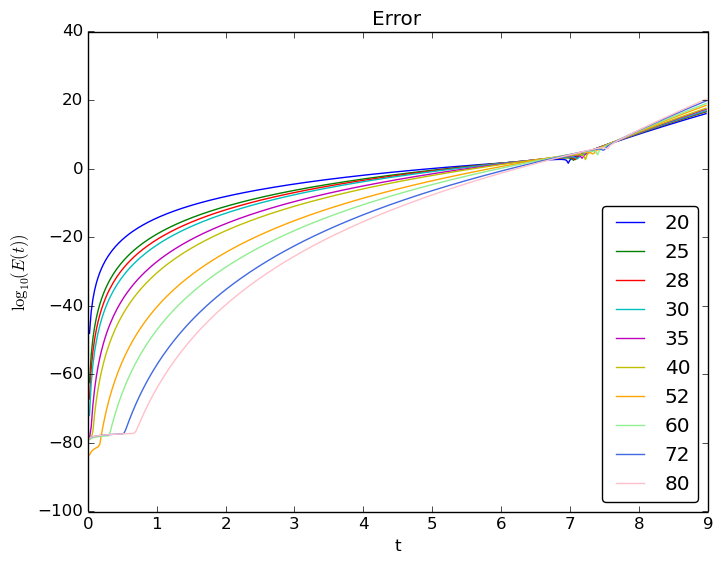

PyObject <matplotlib.legend.Legend object at 0x7fdbb90fe0d0>

In [32]:
plot(b1[1],log10.(b1[2]),marker= "None", label="$O1")
plot(b2[1],log10.(b2[2]),marker= "None", label="$O2")
plot(b3[1],log10.(b3[2]),marker= "None", label="$O3")
plot(b4[1],log10.(b4[2]),marker= "None", label="$O4")
plot(b5[1],log10.(b5[2]),marker= "None", label="$O5")
plot(b6[1],log10.(b6[2]),marker= "None", label="$O6")
plot(b7[1],log10.(b7[2]),marker= "None", label="$O7", color="orange")
plot(b8[1],log10.(b8[2]),marker= "None", label="$O8", color ="lightgreen" )
plot(b9[1],log10.(b9[2]),marker= "None", label="$O9", color="royalblue")
plot(b10[1],log10.(b10[2]),marker= "None", label="$O10",color="pink")

xlabel("t")
ylabel(L"\log_{10}(E(t))")
title("Error")
legend(loc="low right",fancybox="true")

In [37]:
O2 = 20
O1 = 10
O5 = 30
O6 = 40
O3 = 25
O4 = 28
O7 = 60
O9 = 90
O8 = 80
x_fijo = [0.,0.] 
tiempo = [-3.,3.]
delta_t = 0.125
V1, h1, vec1, val1 = Estable(estandar1,O1 , x_fijo,tiempo, delta_t); 
V2, h2, vec2, val2 = Estable(estandar1,O2 , x_fijo,tiempo, delta_t); 
V3, h3, vec3, val3 = Estable(estandar1,O3 , x_fijo,tiempo, delta_t); 
V4, h4, vec4, val4 = Estable(estandar1,O4 , x_fijo,tiempo, delta_t); 
V5, h5, vec5, val5 = Estable(estandar1,O5 , x_fijo,tiempo, delta_t); 
V6, h6, vec6, val6 = Estable(estandar1,O6 , x_fijo,tiempo, delta_t); 
V7, h7, vec7, val7 = Estable(estandar1,O7 , x_fijo,tiempo, delta_t); 
V8, h8, vec8, val8 = Estable(estandar1,O8 , x_fijo,tiempo, delta_t); 
V9, h9, vec9, val9 = Estable(estandar1,O9 , x_fijo,tiempo, delta_t);

In [38]:
Tiempo = [0.,7.]
Error1A = CalculoError(estandar1, V1,h1,Tiempo,0.025 );
Error2A = CalculoError(estandar1, V2,h2,Tiempo,0.025 );
Error3A = CalculoError(estandar1, V3,h3,Tiempo,0.025 );
Error4A = CalculoError(estandar1, V4,h4,Tiempo,0.025 );
Error5A = CalculoError(estandar1, V5,h5,Tiempo,0.025 );
Error6A = CalculoError(estandar1, V6,h6,Tiempo,0.025 );
Error7A = CalculoError(estandar1, V7,h7,Tiempo,0.025 );
Error8A = CalculoError(estandar1, V8,h8,Tiempo,0.025 );
Error9A = CalculoError(estandar1, V9,h9,Tiempo,0.025 );



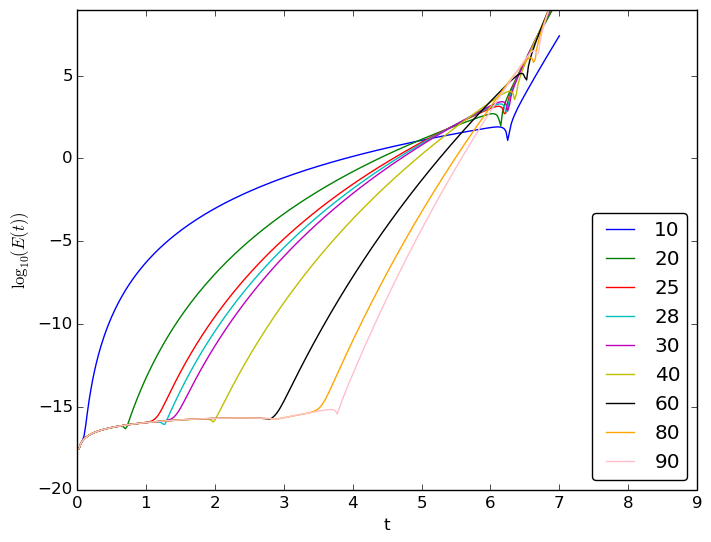

PyObject <matplotlib.legend.Legend object at 0x7fdbb8e87ad0>

In [39]:
plot(Error1A[1],log10.(Error1A[2]),marker= "None", label="$O1")
plot(Error2A[1],log10.(Error2A[2]),marker= "None", label="$O2")
plot(Error3A[1],log10.(Error3A[2]),marker= "None", label="$O3")
plot(Error4A[1],log10.(Error4A[2]),marker= "None", label="$O4")
plot(Error5A[1],log10.(Error5A[2]),marker= "None", label="$O5")
plot(Error6A[1],log10.(Error6A[2]),marker= "None", label="$O6")
plot(Error7A[1],log10.(Error7A[2]),marker= "None", label="$O7")
plot(Error8A[1],log10.(Error8A[2]),marker= "None", label="$O8",color="orange")
plot(Error9A[1],log10.(Error9A[2]),marker= "None", label="$O9",color ="pink")
xlabel("t")
ylabel(L"\log_{10}(E(t))")
#title("Error")
#grid("on")
xlim(0.,9.)
ylim(-20,9.)
legend(loc="lower right",fancybox="true",markerscale=3)